In [11]:
import numpy as np
from itertools import product

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt



def show_kernel(kernel, label=True, digits=None, text_size=28):
  # Format kernel
  kernel = np.array(kernel)
  if digits is not None:
    kernel = kernel.round(digits)

  # Plot kernel
  cmap = plt.get_cmap('Blues_r')
  plt.imshow(kernel, cmap=cmap)
  rows, cols = kernel.shape
  thresh = (kernel.max() + kernel.min()) / 2
  # Optionally, add value labels
  if label:
    for i, j in product(range(rows), range(cols)):
      val = kernel[i, j]
      color = cmap(0) if val > thresh else cmap(255)
      plt.text(
          j, i, val,
          color=color, size=text_size,
          horizontalalignment='center', verticalalignment='center'
      )

  plt.xticks([])
  plt.yticks([])

 `the base` is to extract visual features from an image, which `the head` would then use to classify the image.

**two most important** types of layers in the base :

**convolutional layer with ReLU activation, and the maximum pooling layer.**

**Feature extraction:**

1. Filter an image for a particular feature (convolution)
2. Detect that feature within the filtered image (ReLU)
3. Condense the image to enhance the features (maximum pooling)

# A convolutional layer carries out the filtering step

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Conv2D(filters=64, kernel_size=3, activation='relu')   # Activation is None
    # We will have more layers to follow
])

**Apply Convolution and ReLu**

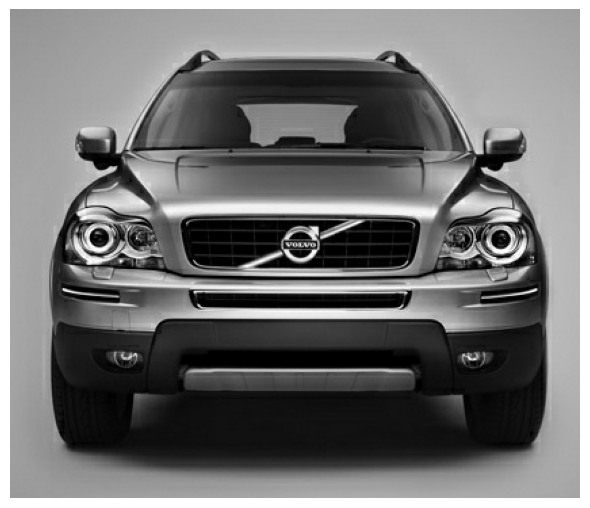

In [13]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')

# Load
image = tf.io.read_file("/content/car_feature.jpg")
image = tf.io.decode_jpeg(image)

# Plot
plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image), cmap='gray')
plt.axis("off")
plt.show()

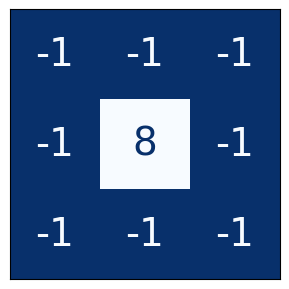

In [14]:
kernel = tf.constant([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

plt.figure(figsize=(3, 3))
show_kernel(kernel)

In [15]:
# Reformatting for batch compatibility

image = tf.image.convert_image_dtype(image, dtype=tf.float32)
image = tf.expand_dims(image, axis=0)
kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
kernel = tf.cast(kernel, dtype=tf.float32)

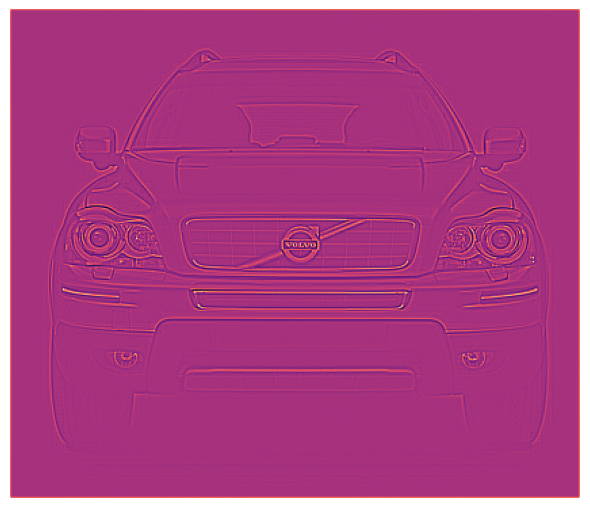

In [16]:
image_filter = tf.nn.conv2d(
    input=image,
    filters=kernel,
    strides=1,
    padding='SAME'
)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_filter))
plt.axis('off')
plt.show()

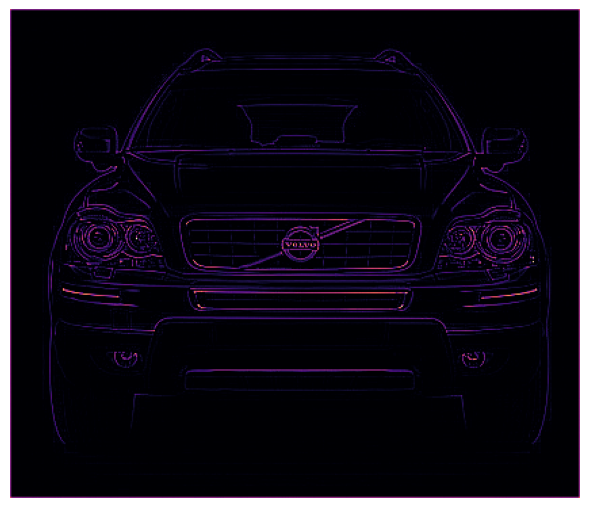

In [17]:
image_detect = tf.nn.relu(image_filter)

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(image_detect))
plt.axis('off')
plt.show()

**Conclusion**
We saw in this lesson the first two steps a convnet uses to perform feature extraction: filter with `Conv2D layers` and detect with `relu activation.`